# DQN Training

### Start the Environment

We begin by importing some necessary packages and starting the environment.  
If the code cell below returns an error, please revisit installation instructions given in the README.md.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

# If you've installed environment in different location, fix file_name here:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Train the Agent

In the next cell, we define the training procedure.

In [2]:
def train(env, brain_name, agent, n_episodes=2000, max_t=1000, target_avg_score=13, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        target_avg_score (float): target average score over 100 episodes to consider environment solved
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = int(agent.act(state, eps))
            env_info = env.step(action)[brain_name]
            next_state, reward, done = (env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0])
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        avg_score = np.mean(scores[-100:])
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))
        if avg_score >= target_avg_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, avg_score))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

#### Start Training

In [6]:
# Import agent from 'src' folder.
import sys
sys.path.insert(0, 'src')
from dqn_agent import Agent

# Create agent.
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# Start training!
scores = train(env, brain_name, agent)

Episode 100	Average Score: 0.83
Episode 200	Average Score: 4.77
Episode 300	Average Score: 7.82
Episode 400	Average Score: 11.15
Episode 470	Average Score: 13.00
Environment solved in 370 episodes!	Average Score: 13.00


#### Plot Scores

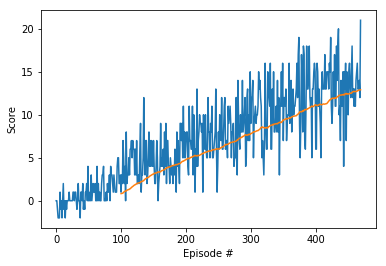

In [13]:
import matplotlib.pyplot as plt

# Calculate average scores over 100 episodes
window = 100
avg_scores = []
for i in range(len(scores) - window):
    avg_scores.append(np.mean(scores[i:i + window]))
    
# Plot the scores and average
fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(window, len(avg_scores) + window), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [14]:
env.close()